# <p style="color:green;">Wie erstellt man ein Vorhersagemodell in Python?</p>
# <p style="color:green;">How to Build a Predictive Model in Python?</p>
1- Importieren Sie Python-Bibliotheken
1- Import Python Libraries


2- Lesen Sie den Datensatz 2-Read the Dataset


3-Erkunden Sie den Datensatz 3-Explore the Dataset


4-Feature Selection 4-Feature-Auswahl


5-Build the Model 5-Erstellen eines Python-Modells


6-Evaluate the Model’s Performance


7- Vorhersagemodellierung  7-Predictive Modelling

In [108]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [109]:

from sklearn import neighbors
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error 
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import sklearn
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline

In [110]:
diabetes_data = pd.read_csv('diabetes.csv')

In [111]:
#Print the first 5 rows of the dataframe.
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [112]:
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [113]:
diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [114]:
# Supondo que o DataFrame seja chamado diabetes_data
rows_with_bmi_0 = diabetes_data[diabetes_data['BMI'] == 0]
# Exibindo as linhas onde BMI é igual a 0
print(rows_with_bmi_0)

# Supondo que o DataFrame seja chamado diabetes_data
diabetes_data['BMI'] = diabetes_data['BMI'].replace(0, float('NaN'))
diabetes_data['Insulin'] = diabetes_data['Insulin'].replace(0, float('NaN'))
diabetes_data['SkinThickness'] = diabetes_data['SkinThickness'].replace(0, float('NaN'))
diabetes_data['BloodPressure'] = diabetes_data['BloodPressure'].replace(0, float('NaN'))
diabetes_data['Glucose'] = diabetes_data['Glucose'].replace(0, float('NaN'))
print(diabetes_data)


     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin  BMI  \
9              8      125             96              0        0  0.0   
49             7      105              0              0        0  0.0   
60             2       84              0              0        0  0.0   
81             2       74              0              0        0  0.0   
145            0      102             75             23        0  0.0   
371            0      118             64             23       89  0.0   
426            0       94              0              0        0  0.0   
494            3       80              0              0        0  0.0   
522            6      114              0              0        0  0.0   
684            5      136             82              0        0  0.0   
706           10      115              0              0        0  0.0   

     DiabetesPedigreeFunction  Age  Outcome  
9                       0.232   54        1  
49                      0.305  

In [115]:
diabetes_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,763.0,121.686763,30.535641,44.000,99.00000,117.0000,141.00000,199.00
BloodPressure,733.0,72.405184,12.382158,24.000,64.00000,72.0000,80.00000,122.00
SkinThickness,541.0,29.153420,10.476982,7.000,22.00000,29.0000,36.00000,99.00
Insulin,394.0,155.548223,118.775855,14.000,76.25000,125.0000,190.00000,846.00
BMI,757.0,32.457464,6.924988,18.200,27.50000,32.3000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


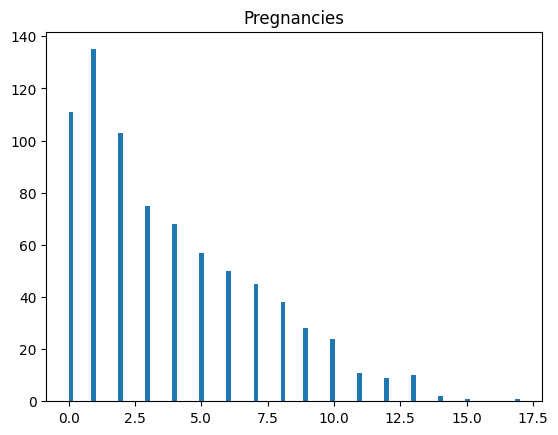

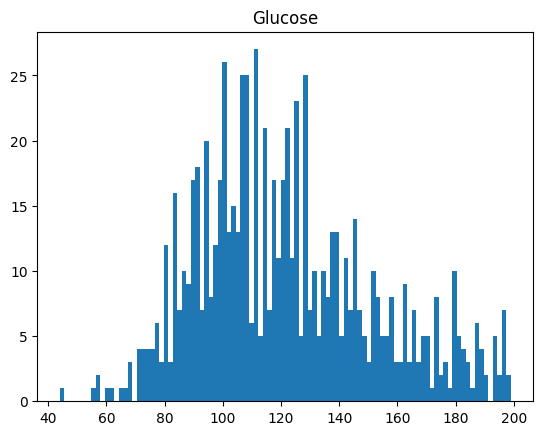

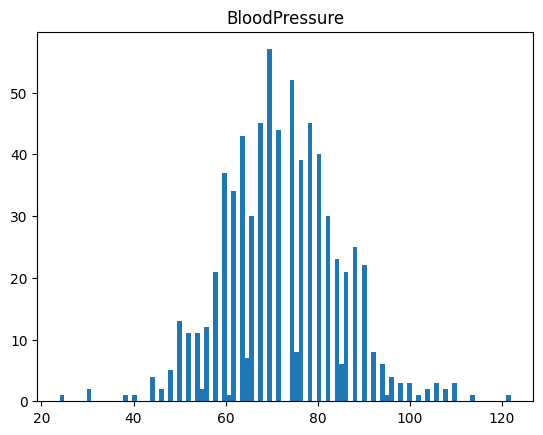

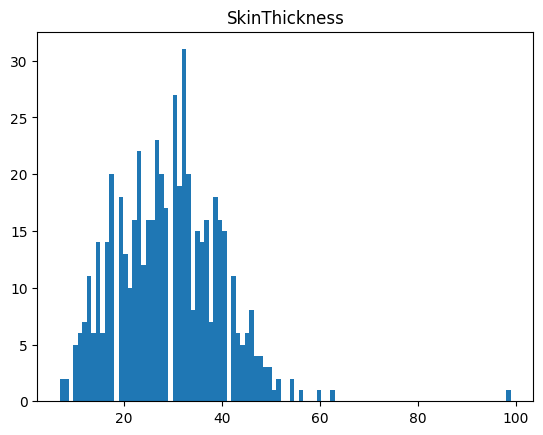

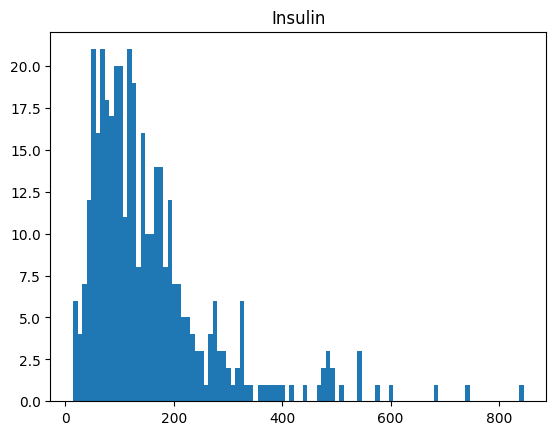

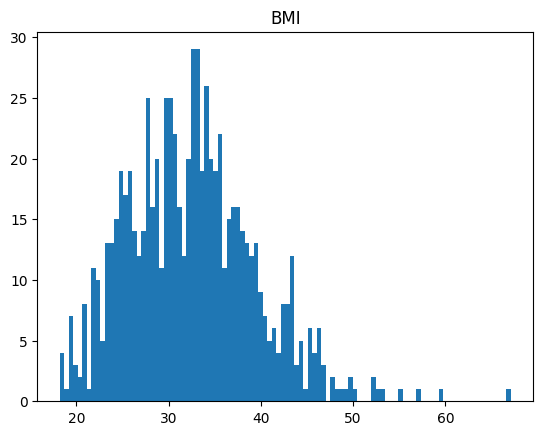

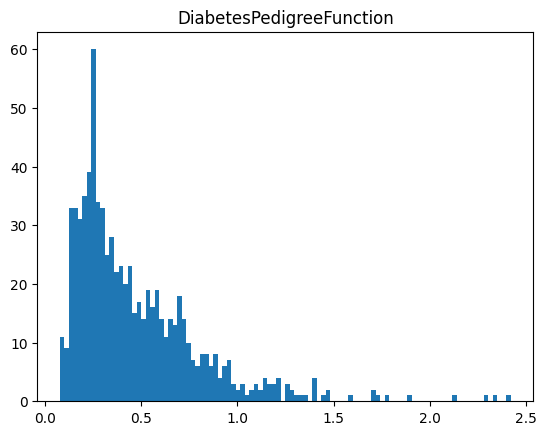

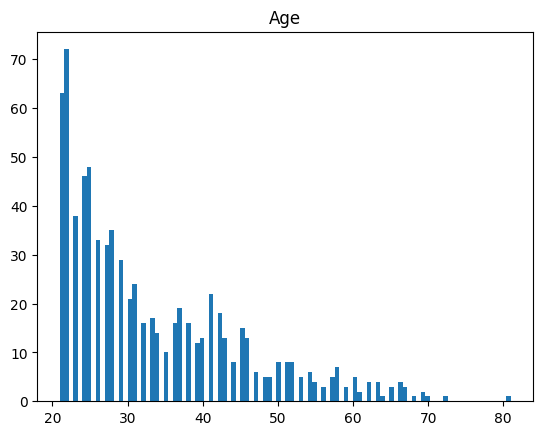

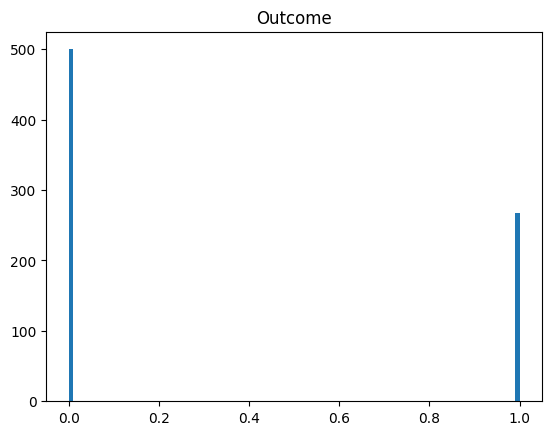

In [116]:
import matplotlib.pyplot as plt
for col in diabetes_data:
    plt.hist(diabetes_data[col],bins= 100)
    plt.title(f'{col}')
    plt.show()

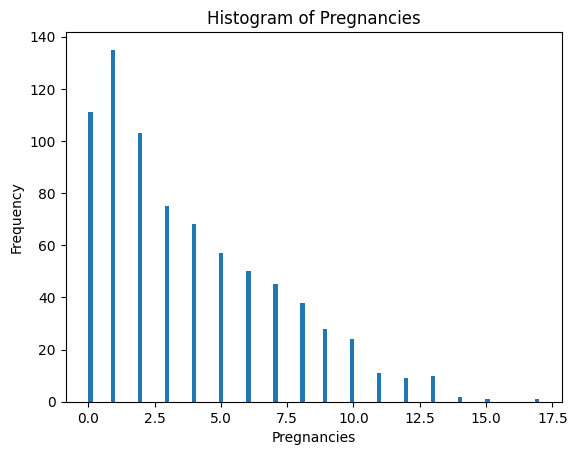

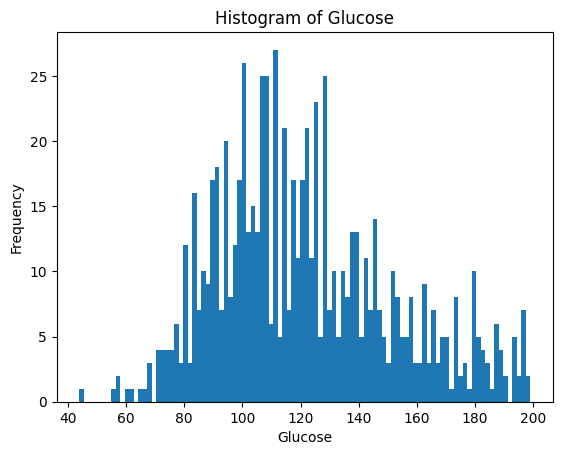

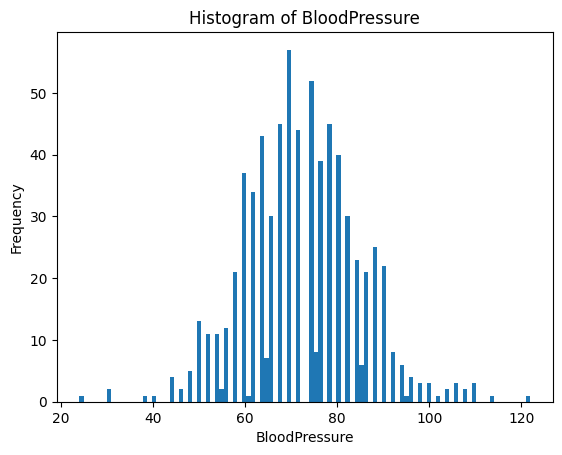

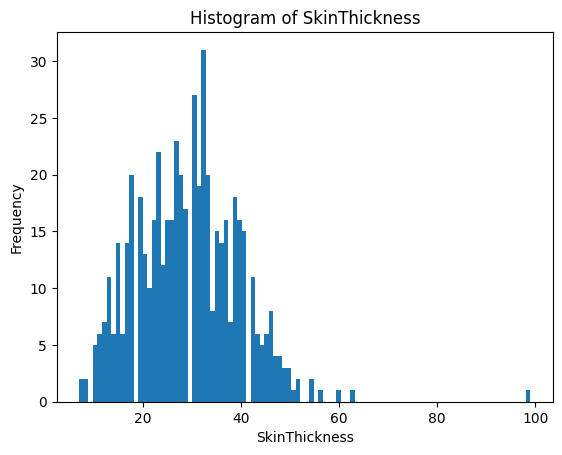

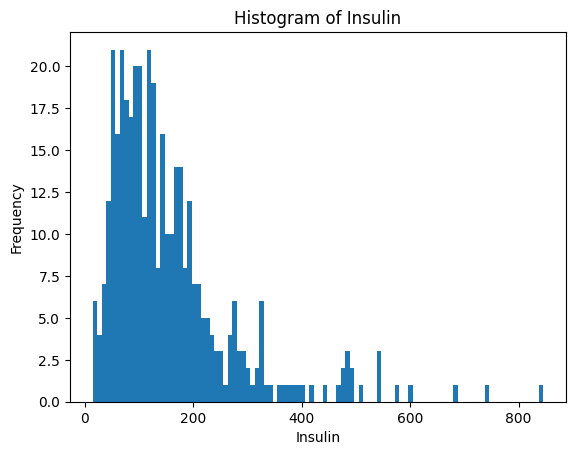

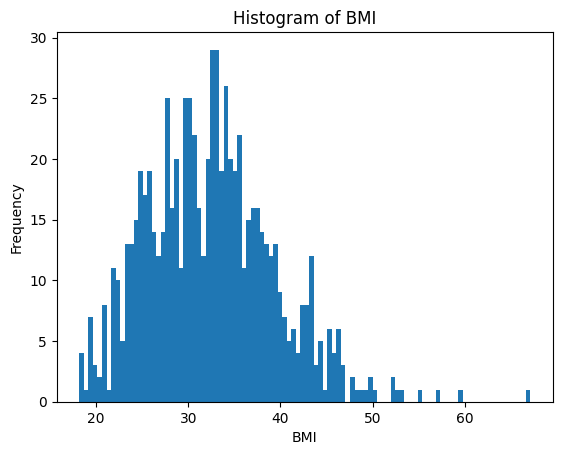

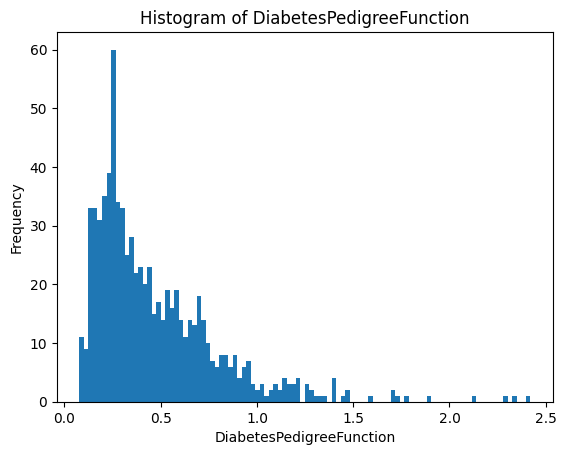

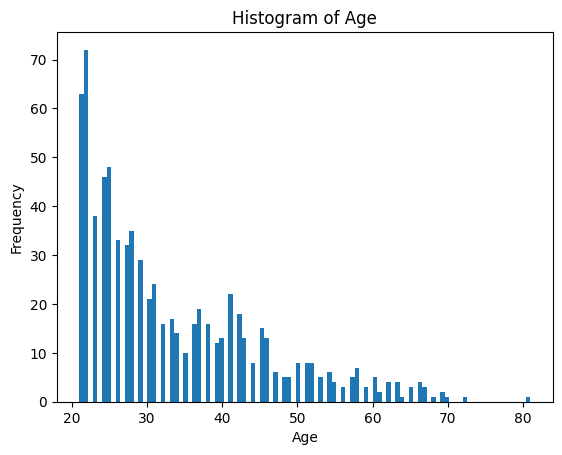

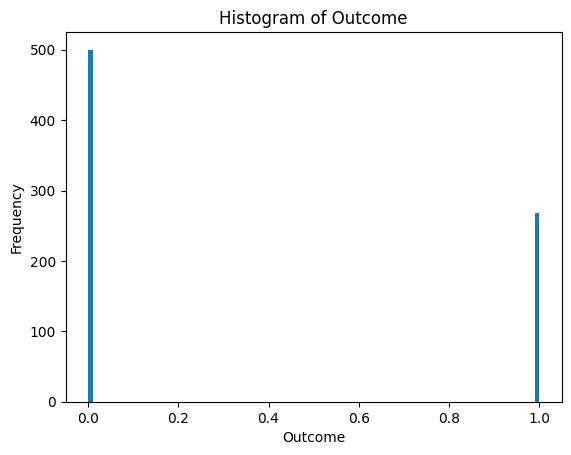

In [117]:
import matplotlib.pyplot as plt

# Assuming columns have meaningful names, we can use them for axis labels
for col in diabetes_data:
    plt.hist(diabetes_data[col], bins=100)
    
    # Adding labels to the axes
    plt.xlabel(col)  # x-axis label
    plt.ylabel('Frequency')  # y-axis label
    
    plt.title(f'Histogram of {col}')  # Adding a title to the plot
    
    plt.show()


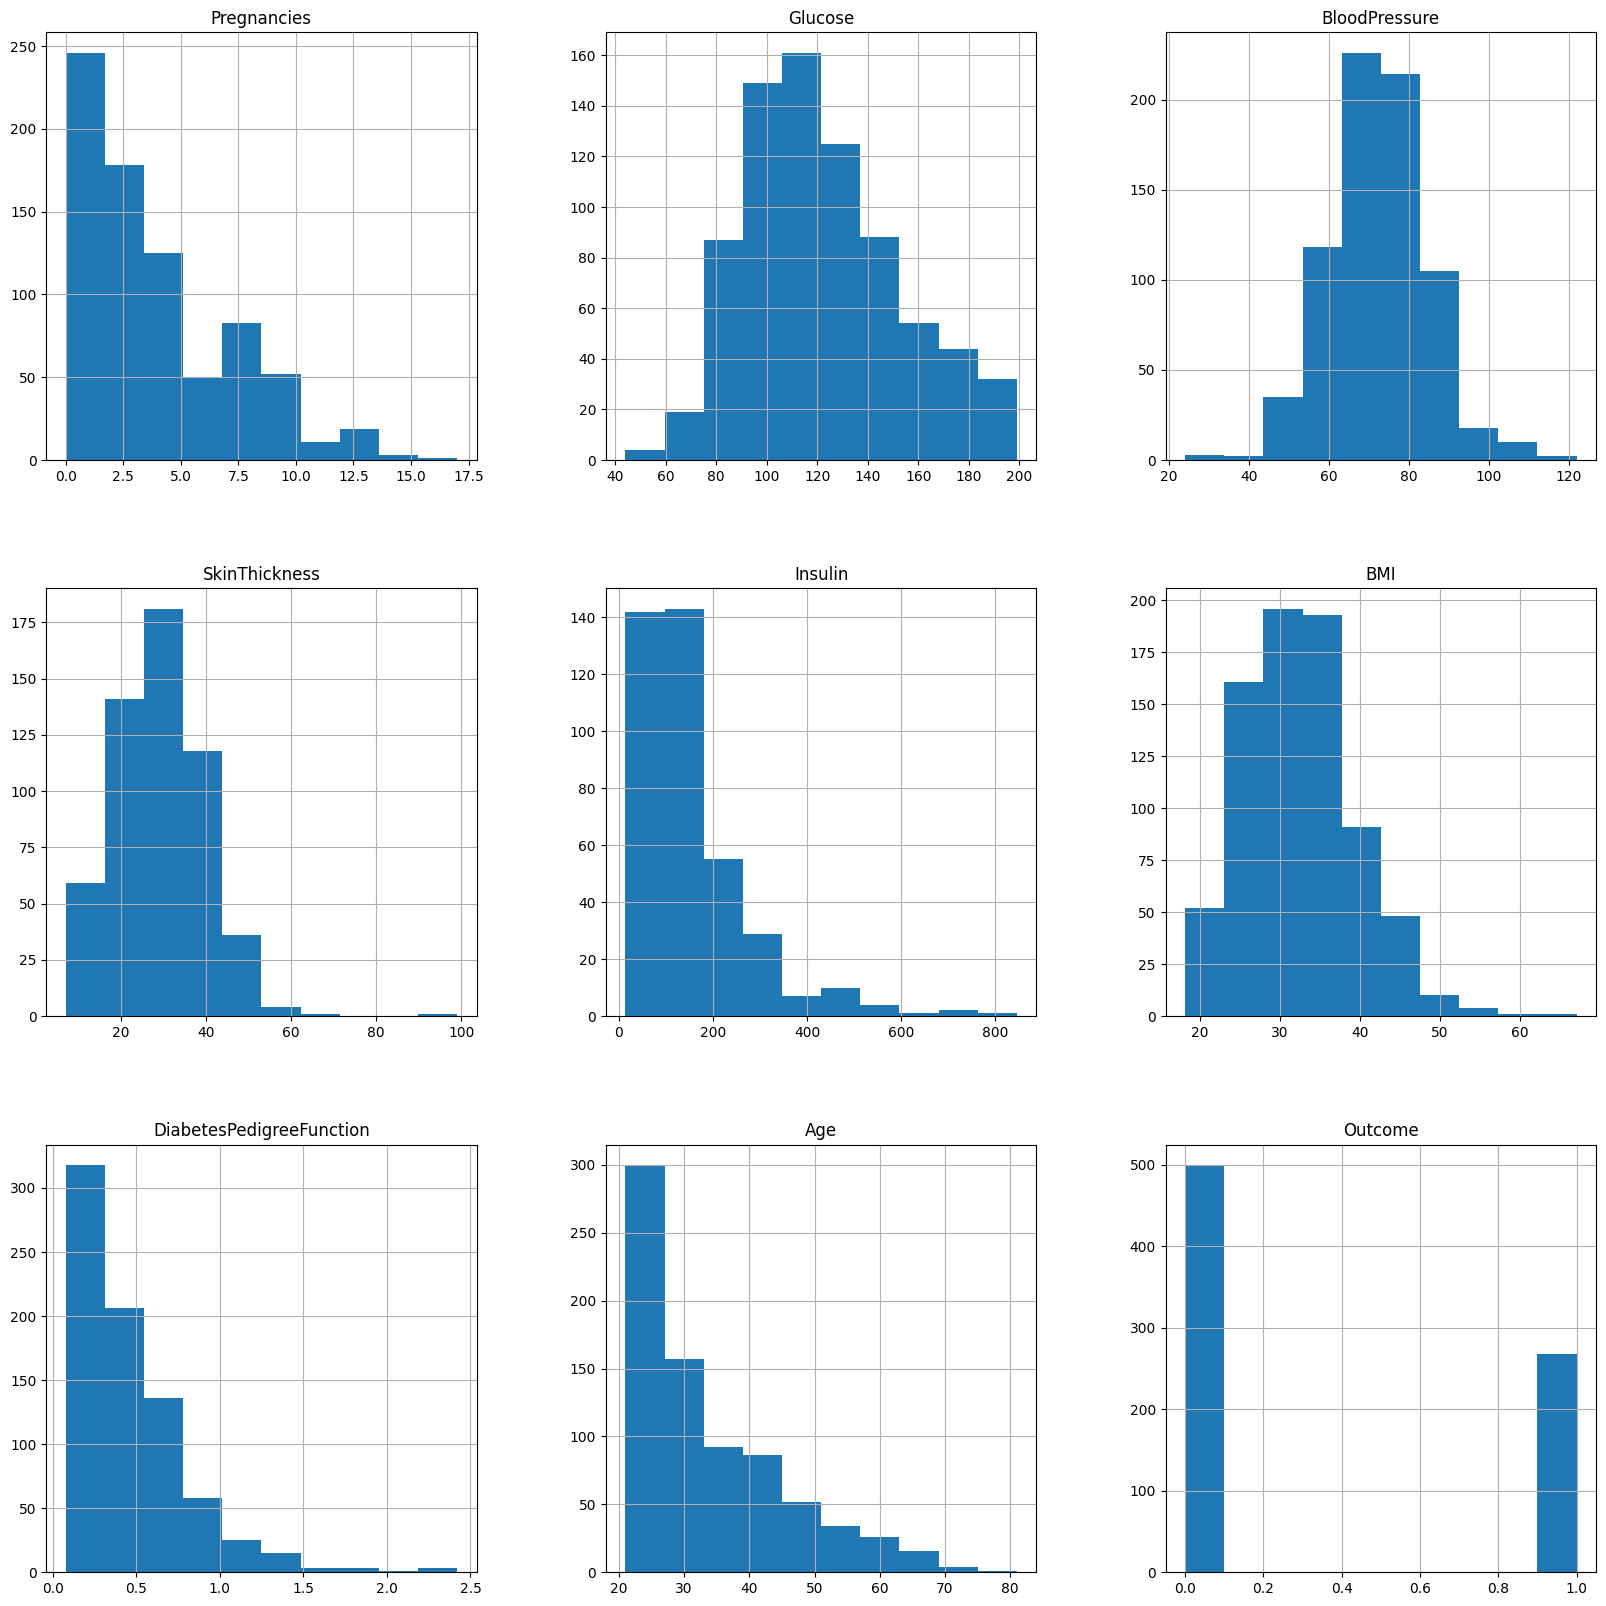

In [118]:
p = diabetes_data.hist(figsize = (20,20))

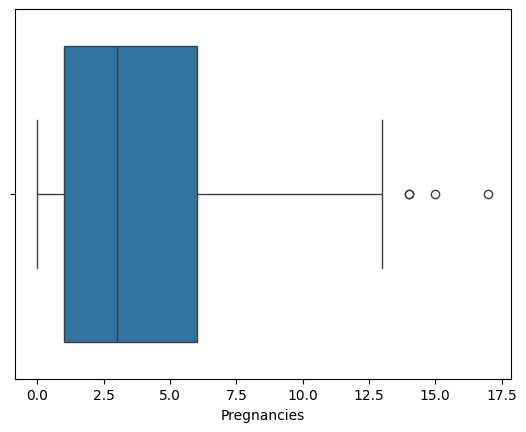

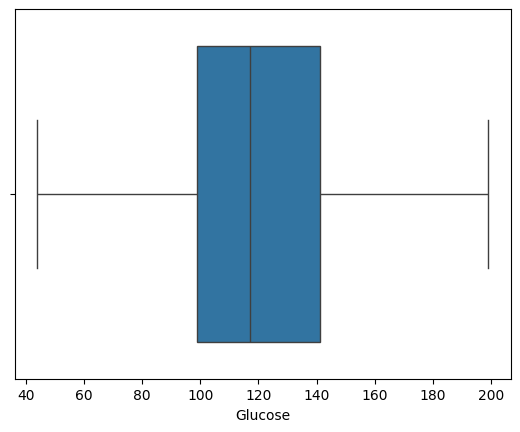

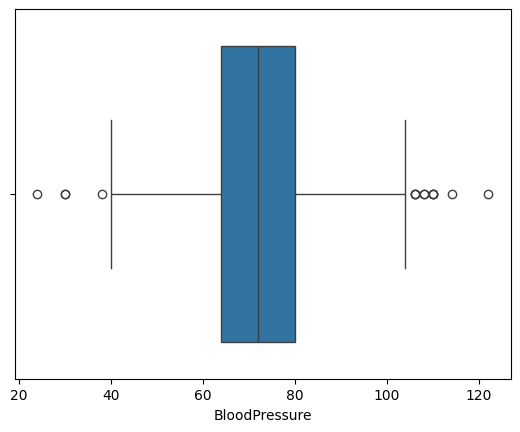

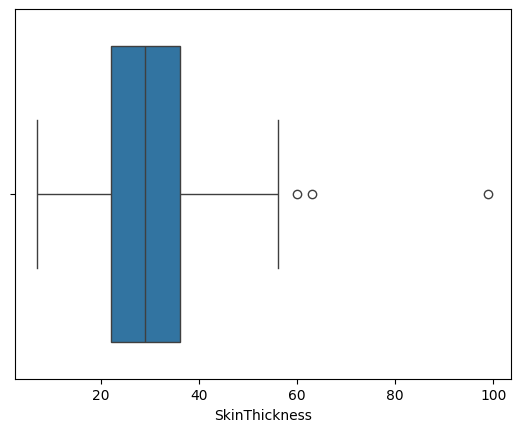

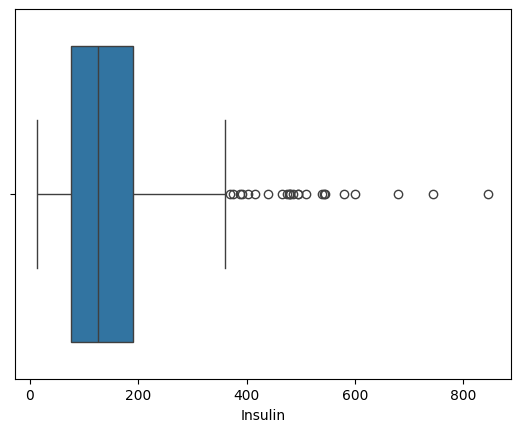

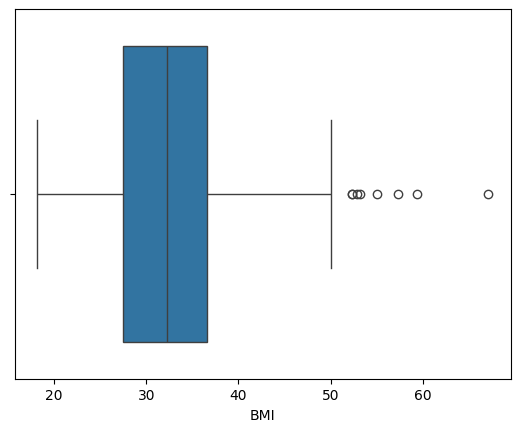

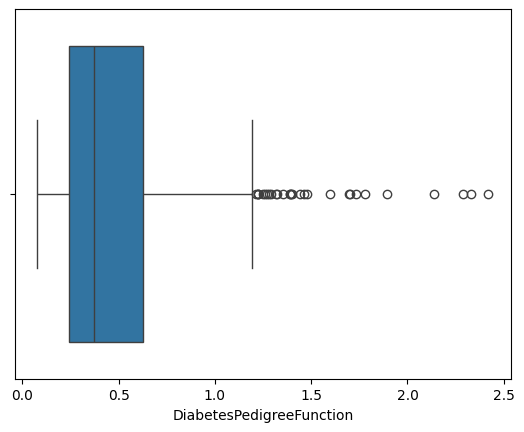

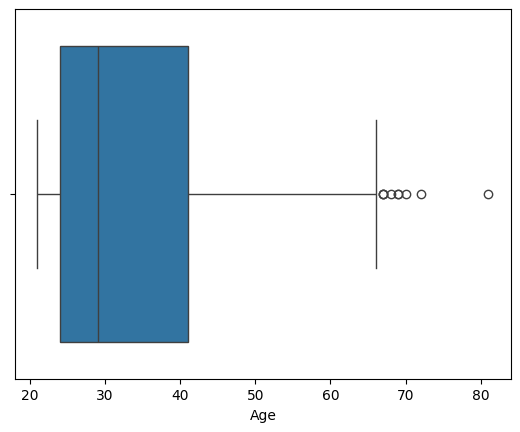

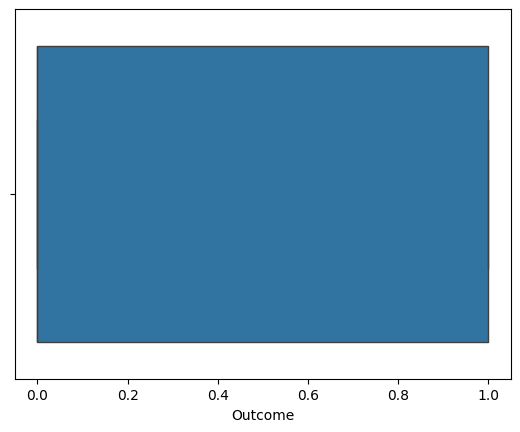

In [119]:
for col in diabetes_data:
        sns.boxplot(x=col, data=diabetes_data)
        plt.show()

#An outlier is an observation that lies an abnormal distance from other values in a random sample from a population. 

In [120]:
import numpy as np

In [121]:
# removing the outliers from IC1 - we don't always do it, only for good reasons
# but if we want to do it, this is how:
#  for col in diabetes_data:
#      iqr = np.percentile(diabetes_data['Age'],75) - np.percentile(diabetes_data['Age'],25)
#      upper_limit = np.percentile(diabetes_data['Age'],75) + 1.5*iqr
#      lower_limit = np.percentile(diabetes_data['Age'],25) - 1.5*iqr
#      data_diabets2= diabetes_data[(diabetes_data['Age']>lower_limit) & (diabetes_data['Age']<upper_limit)]

In [122]:
# for col in diabetes_data:     
#         iqr = np.percentile(diabetes_data,75) - np.percentile(diabetes_data,25)
#         upper_limit = np.percentile(diabetes_data,75) + 1.5*iqr
#         lower_limit = np.percentile(diabetes_data,25) - 1.5*iqr
#         data_diabets2= diabetes_data[(diabetes_data>lower_limit) & (diabetes_data<upper_limit)]

In [123]:
for col in diabetes_data:     
        iqr = np.percentile(diabetes_data[col],75) - np.percentile(diabetes_data[col],25)
        upper_limit = np.percentile(diabetes_data[col],75) + 1.5*iqr
        lower_limit = np.percentile(diabetes_data[col],25) - 1.5*iqr
        # print(f'{iqr=}, {upper_limit=}, {lower_limit=}')
        data_diabets2 = diabetes_data[(diabetes_data[col]>lower_limit) & (diabetes_data[col]<upper_limit)]

In [124]:
data_diabets2

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0
764,2,122.0,70.0,27.0,NaN,36.8,0.340,27,0
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0
766,1,126.0,60.0,NaN,NaN,30.1,0.349,47,1


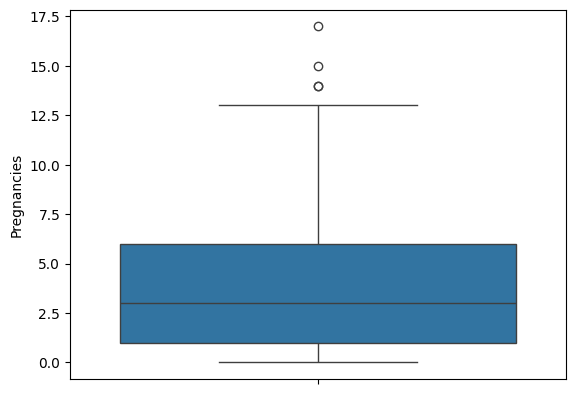

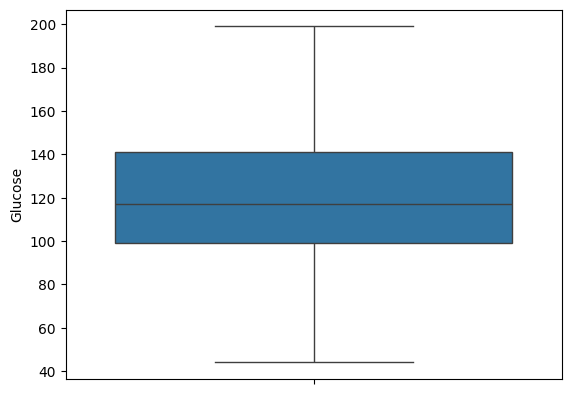

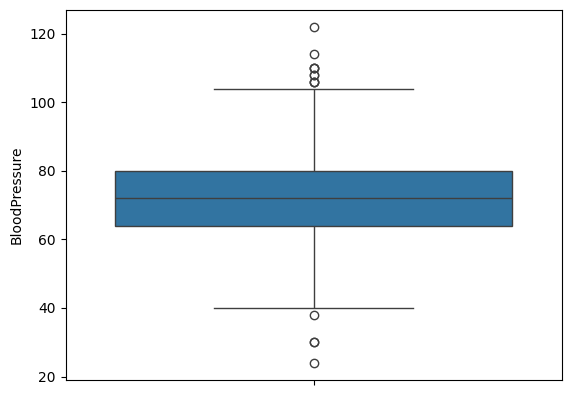

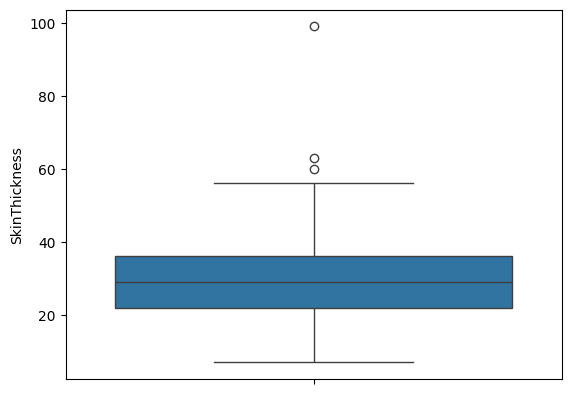

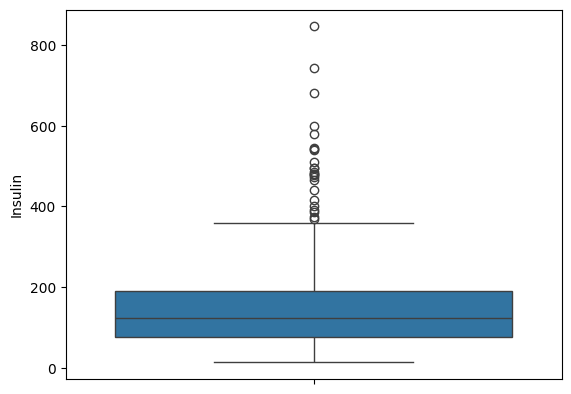

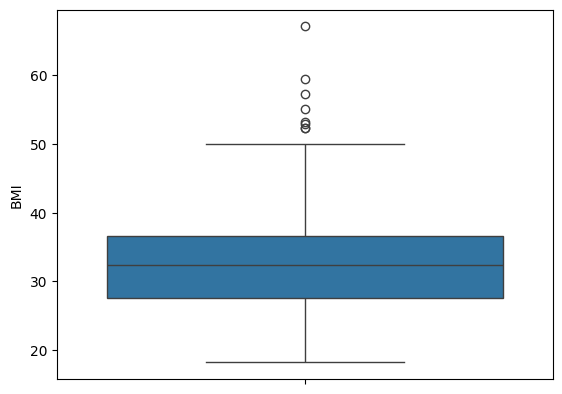

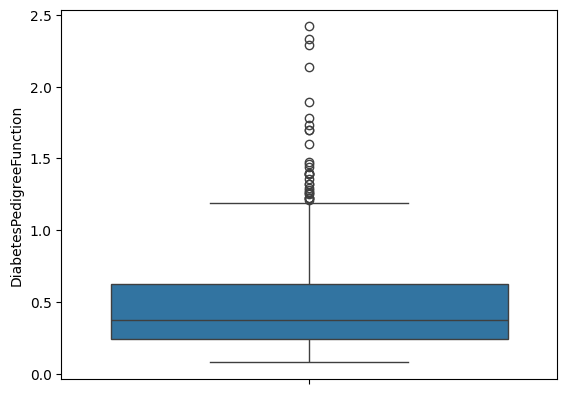

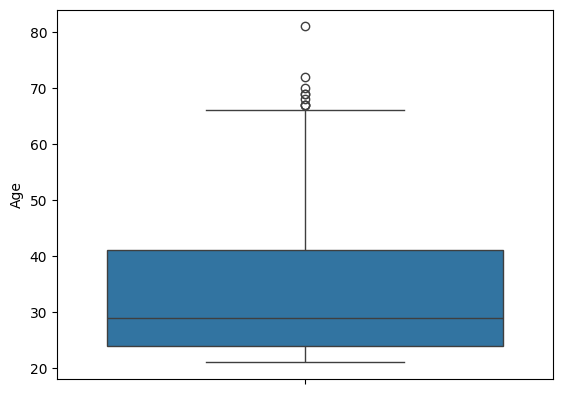

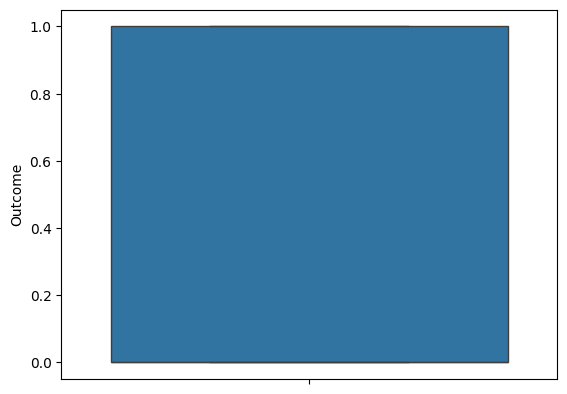

In [155]:
for col in data_diabets2:
        sns.boxplot(y=col, data=data_diabets2)
        plt.show()

In [126]:
# data_IC1= data[(data['IC1']>lower_limit) & (data['IC1']<upper_limit)]

In [127]:
diabetes_data.shape

(768, 9)

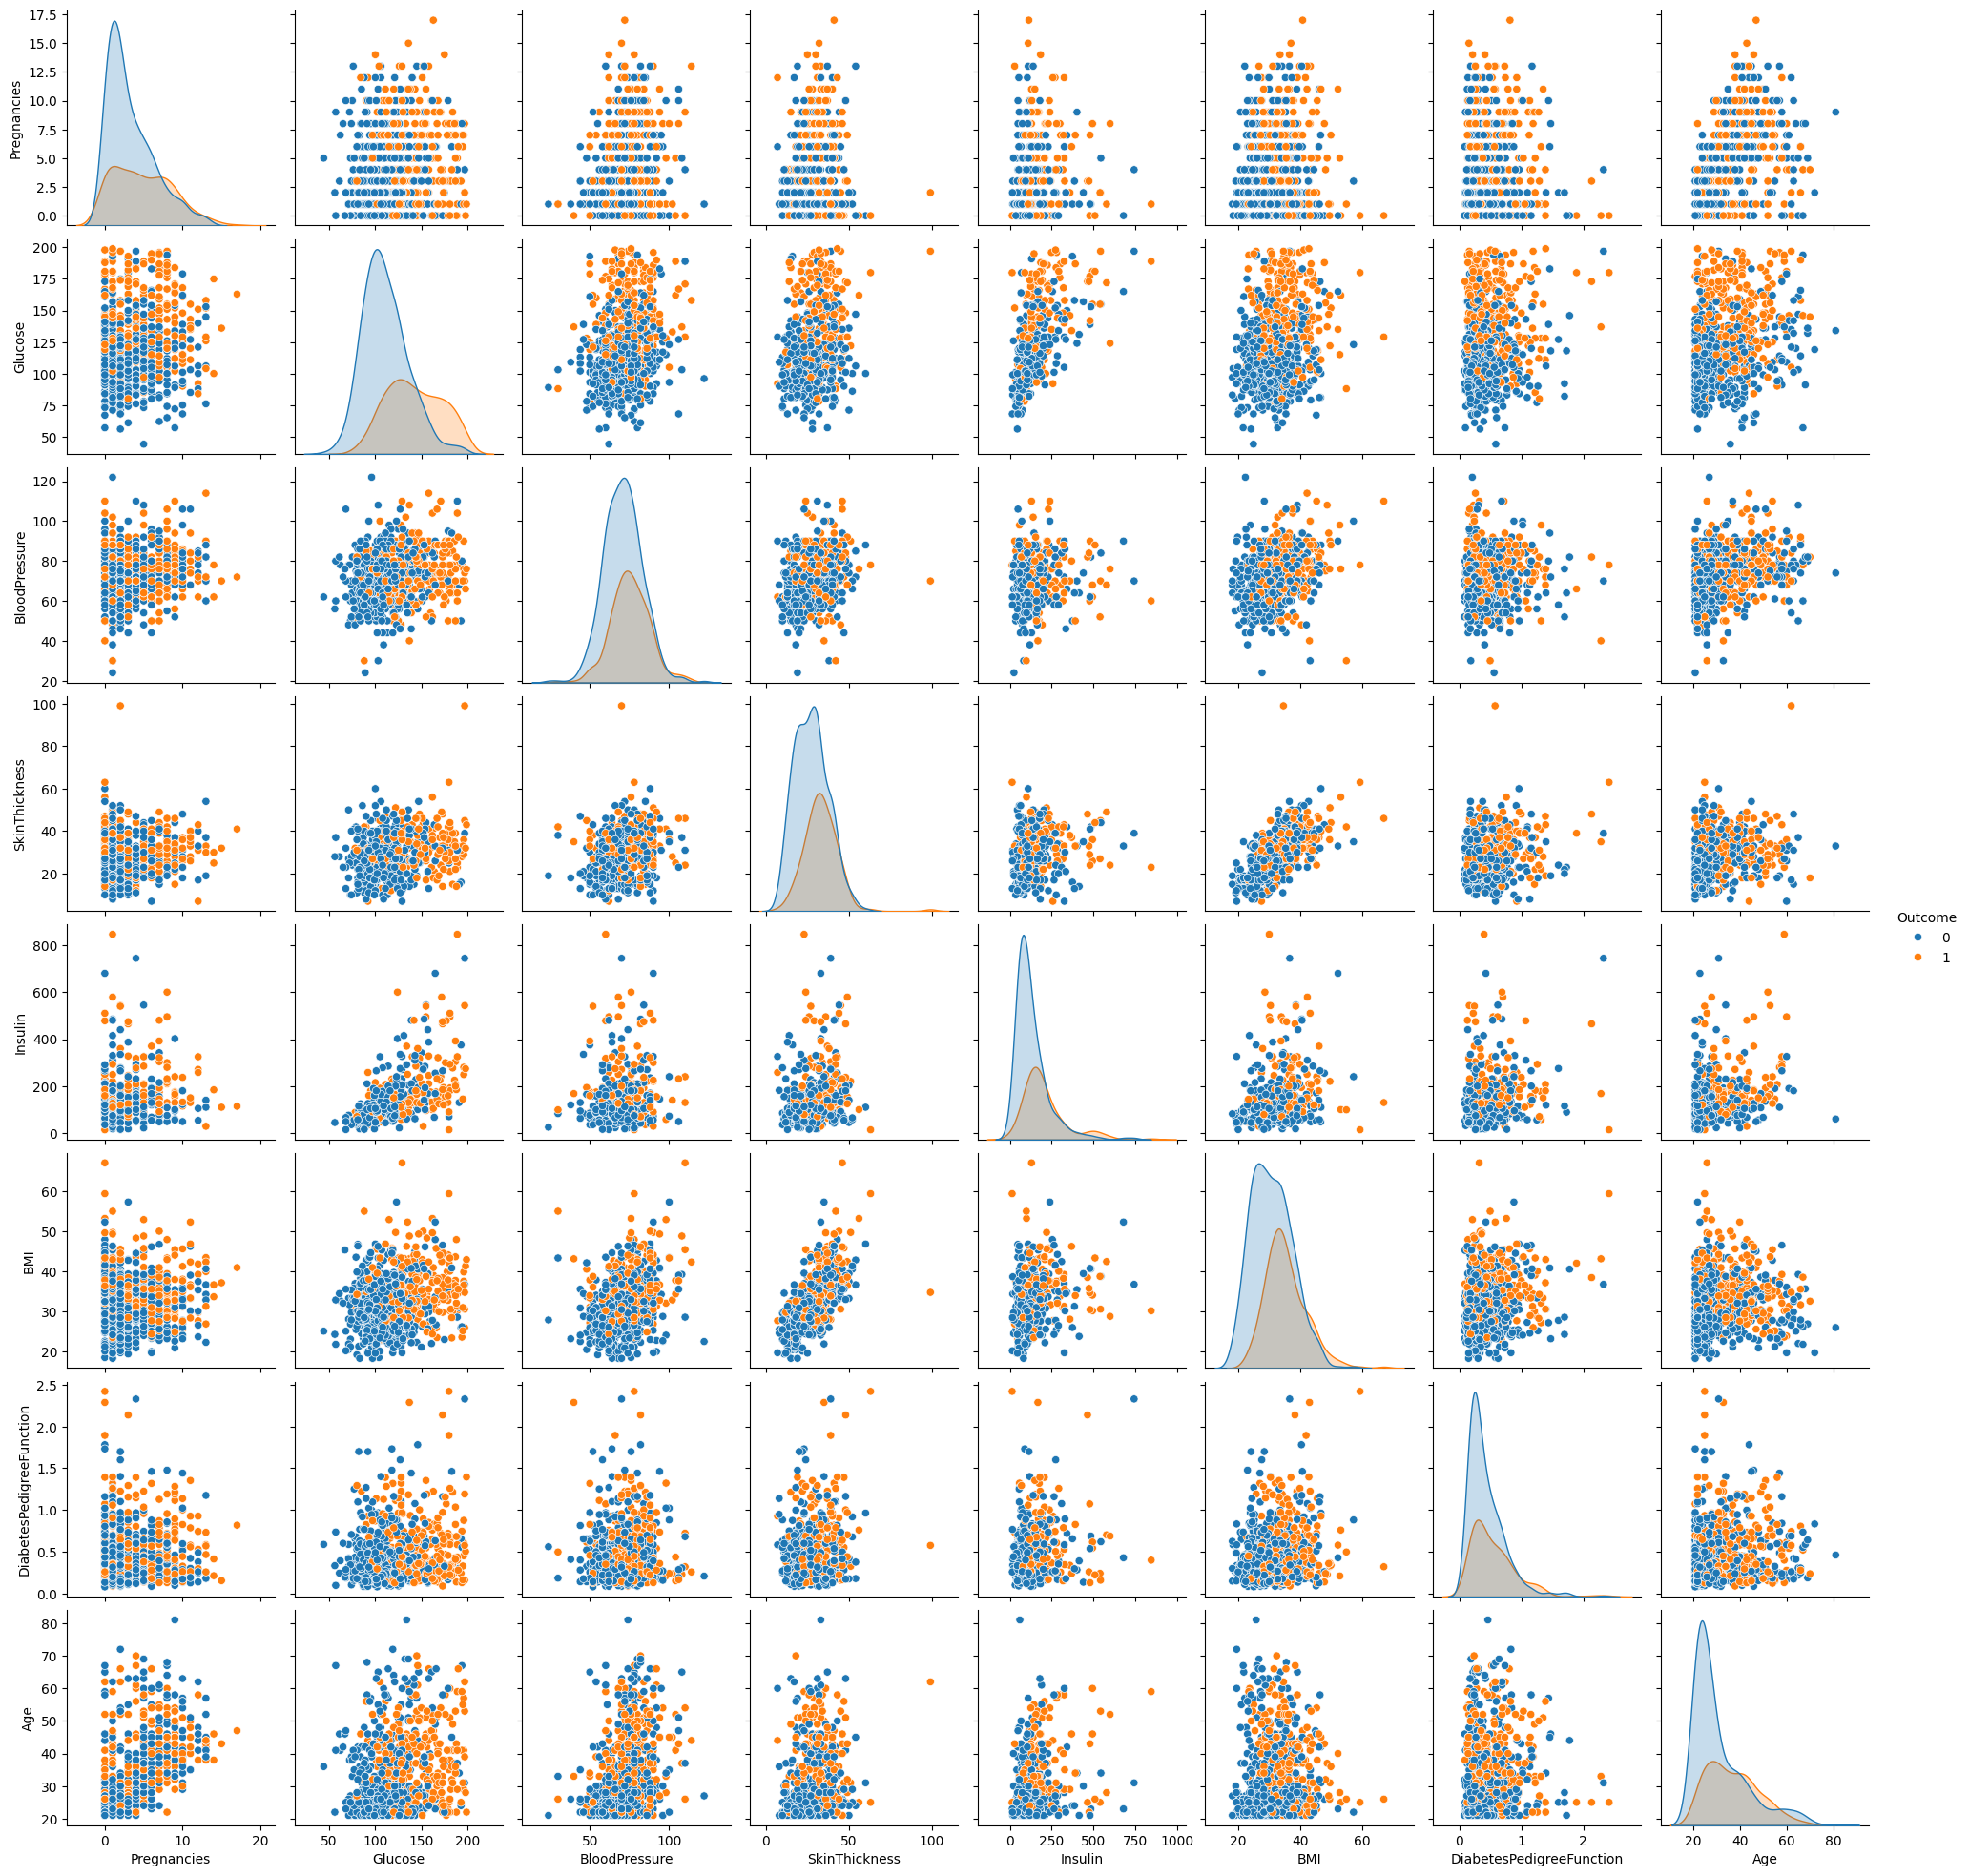

In [128]:
p=sns.pairplot(diabetes_data, hue = 'Outcome')

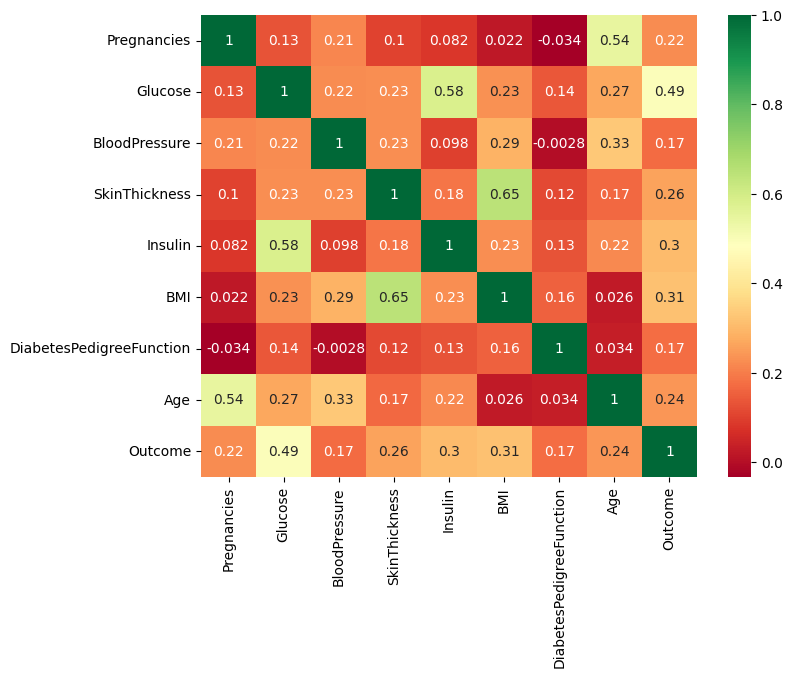

In [129]:
plt.figure(figsize=(8,6))  # on this line I just set the size of figure to 12 by 10.
p=sns.heatmap(diabetes_data.corr(), annot=True,cmap ='RdYlGn')  # seaborn has very simple solution for heatmap


# outcone= Pregnencies + gLUCOSE + bLOODPRESSURE+ skin+insulin+bmi+diabetes+age+ errors 

Der Korrelationskoeffizient reicht von -1 bis +1.

Wenn es nahe bei +1 liegt, bedeutet dies, dass eine starke positive Korrelation besteht. Wir können also sehen, dass es eine starke positive Korrelation zwischen Class und Bare_Nuclei, Class und Uniformity_Cell_Shape, Class und Uniformity_Cell_Size gibt.

Wenn es nahe bei -1 liegt, bedeutet dies, dass eine starke negative Korrelation besteht. Wenn es nahe bei 0 liegt, bedeutet dies, dass keine Korrelation besteht.

Wir können feststellen, dass Einige Variablen sind positiv korreliert, während einige Variablen negativ korreliert sind.

The correlation coefficient ranges from -1 to +1.

When it is close to +1, this signifies that there is a strong positive correlation. So, we can see that there is a strong positive correlation between Class and Bare_Nuclei, Class and Uniformity_Cell_Shape, Class and Uniformity_Cell_Size.

When it is clsoe to -1, it means that there is a strong negative correlation. When it is close to 0, it means that there is no correlation.
 Some variables are positive correlated while some variables are negatively correlated.

In [130]:
diabetes_data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0
764,2,122.0,70.0,27.0,NaN,36.8,0.340,27,0
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0
766,1,126.0,60.0,NaN,NaN,30.1,0.349,47,1


In [148]:
diabetes_data = diabetes_data.dropna()

In [149]:
X = diabetes_data.drop("Outcome",axis = 1)
y = diabetes_data['Outcome']



In [150]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33
6,3,78.0,50.0,32.0,88.0,31.0,0.248,26
8,2,197.0,70.0,45.0,543.0,30.5,0.158,53
13,1,189.0,60.0,23.0,846.0,30.1,0.398,59


In [151]:
y.head()

3     0
4     1
6     1
8     1
13    1
Name: Outcome, dtype: int64

 # train_test_split

In [152]:
#importing train_test_split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=1/3,random_state=42, stratify=y)

The test_size refers to the number of observations that you want to put in the training data and the test data. If you specify a test_size of 0.2, your test_size will be 20 percent of the original data, therefore leaving the other 80 percent as training data.

The random_state is a parameter that allows you to obtain the same results every time the code is run. train_test_split() makes a random split in the data, which is problematic for reproducing the results. Therefore, it’s common to use random_state. The choice of value in random_state is arbitrary.

# Linear Regression

In [153]:
from sklearn.linear_model import LinearRegression

In [146]:
# Remover linhas com NaN





In [154]:
y_pred_test_lm = lr.predict(X_test)

AttributeError: 'LinearRegression' object has no attribute 'coef_'

In [ ]:
y_pred_test_lm

array([ 0.05812738,  0.39931088,  0.37091656,  0.37585618,  0.42494632,
        0.3777942 ,  0.67949158,  0.68367085, -0.11779199,  0.24550841,
        0.49766821,  0.36114445,  0.31961204,  1.00270961,  0.58463313,
        0.75885376,  0.49993741,  0.01807869,  0.19739217,  0.75863557,
        0.34582777,  0.3046011 ,  0.18008048,  0.39768995,  0.18949365,
        0.46363222,  0.49305005,  0.50050169,  0.38279268,  0.18762697,
        0.18992249,  0.2529809 ,  0.3761215 , -0.14283643, -0.02354093,
        0.1171796 ,  0.15244088,  0.05178145,  0.03702779,  0.04437812,
        0.59273823,  0.32236073,  0.35921224,  0.07449338,  0.94225267,
        0.19627603,  0.58077788,  0.67000231,  0.95345341, -0.00565846,
        0.53118132, -0.19973789,  0.10820767,  0.13063554,  0.43421665,
        0.45429111,  0.2440013 ,  0.91679302,  0.2864992 ,  0.59369159,
        0.05853365,  0.81537752,  0.22089274, -0.5616428 ,  0.09573011,
       -0.0048326 ,  0.44849264,  0.35776225,  0.40559597,  0.49

In [ ]:
y_pred_train_lm = lr.predict(X_train)

In [ ]:
y_pred_train_lm

array([ 0.42030088,  0.23096155,  0.52971016, -0.01116874,  0.29672787,
        0.25901695,  0.35810841,  0.44041381,  0.69985194,  0.04708919,
        0.38245215,  0.67652687,  0.28752288,  0.41606251,  0.30592446,
       -0.01212686,  0.48036385,  0.09927955, -0.06959687,  0.60362322,
        0.45706799,  0.33197116,  0.08229722,  0.64267975,  0.44670426,
        0.46432481,  0.17078854,  0.74267582,  0.68813471,  0.11592319,
        0.03673974,  0.66060608,  0.15498658,  0.16514613,  0.49401057,
        0.11329671,  0.49490621, -0.26810908,  0.69000281,  0.35543045,
        0.65709627,  0.71342254,  0.20482262,  0.13788888,  0.66336988,
        0.0740485 ,  0.71955954,  0.39250137,  0.84770493,  0.48151583,
        0.29903887,  0.80484228,  0.37397906,  0.27674644,  0.15663958,
        0.1165708 ,  0.10638972,  0.61283917,  0.35405899,  0.11692929,
        0.3506403 , -0.00783688,  0.34754232,  0.74762367,  0.63408782,
        0.34676325,  0.92375912,  0.20631309,  0.35711175, -0.07

In [ ]:
# Importing metrics for the evaluation of the model
from sklearn.metrics import r2_score,mean_squared_error

In [ ]:
# calculate Mean square error
mse_test = mean_squared_error(y_test,y_pred_test_lm)
print('mean squared error :',mse_test)

mean squared error : 0.1634323679607934


In [ ]:
mse_train = mean_squared_error(y_train,y_pred_train_lm)
print('mean squared error :',mse_train)

mean squared error : 0.15709594203168267


In [ ]:
# Calculate R square vale
rsq_test = r2_score(y_test,y_pred_test_lm)
print('r square :',rsq_test)

r square : 0.27937134719245393


In [ ]:
rsq_train = r2_score(y_train,y_pred_train_lm)
print('r square :',rsq_train)

r square : 0.30911204006319015


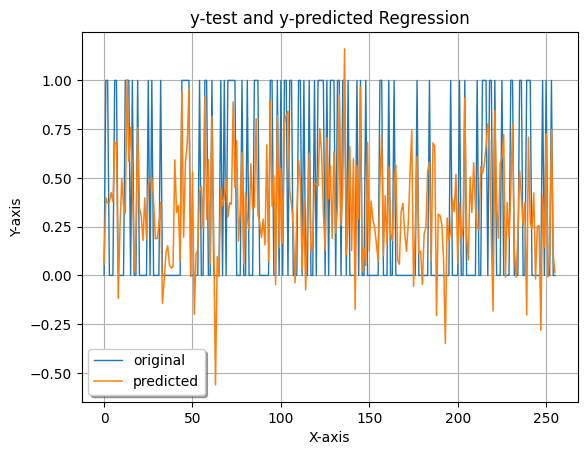

In [ ]:
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, linewidth=1, label="original")
plt.plot(x_ax, y_pred_test_lm, linewidth=1.1, label="predicted")
plt.title("y-test and y-predicted Regression")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

# <p style="color:green;">KNN model<p>  

DIE GRUNDLAGEN DER K-NN-METHODE Diese Methode trifft die Vorhersage für eine neue Beobachtung, basierend auf den K-nächsten Nachbarn.

Der „Abstand“ zwischen den Nachbarn kann beliebig sein: Euklidisch, Manhattan, Minkowski,..... Der optimale Abstand hängt vom Problem ab.

Der Wert von K muss vorher angegeben werden. Diese Methode gelten wie Folgende:

Regression (Mittelwert der Nachbarn) 
Klassifizierung (häufigster Wert bei den Nachbarn)

Der optimale Wert für K kann erhalten werden, indem die interessierenden Fehlermetriken als Funktion von K aufgetragen werden.

Bei der Klassifizierung muss man mit der Wahl von K vorsichtig sein, um Bindungen zu vermeiden. Bei Gleichstand können Distanzgewichte eingeführt werden. Wenn der Gleichstand fortbesteht, kann eine zufällige Wahl zwischen den Nachbarn getroffen werden.

wir nehmen die höchste Variable

kNN ist ein nichtlinearer Lernalgorithmus


THE BASICS OF THE K-NN METHOD
This method makes the prediction for a new observation, based on the K-Nearest Neighbours.

The “distance” between the neighbours can be anyone: Euclidean, Manhattan, Minkowski,..... The optimal one depends on the problem.

The value of K has to be provided beforehand. 

This method can deal with:

Regression (average value from the neighbours)
Classification  (most frequent value from the neighbours)

The optimal value for K can be obtained plotting the error metrics of interest as a function of K.
In classification, one has to be careful with the choices of K to avoid ties. In case of ties, distance weights can be introduced. If the tie persist, a random choice between the neighbours can be made. 

kNN Is a Nonlinear Learning Algorithm

# Fitting a kNN Regression in scikit-learn to the Abalone Dataset

In [ ]:
#from sklearn.neighbors import KNeighborsRegressor
#knn_model = KNeighborsRegressor(n_neighbors=k)

In [ ]:
#You create an unfitted model with knn_model. This model will use the three nearest neighbors to predict the value of a future data point. To get the data into the model, you can then fit the model on the training dataset:

In [ ]:
#knn_model.fit(X_train, y_train)

In [ ]:
#Using .fit(), you let the model learn from the data. At this point, knn_model contains everything that’s needed to make predictions on new abalone data points. That’s all the code you need for fitting a kNN regression using Python!

In [ ]:
#There are many evaluation metrics available for regression, but you’ll use one of the most common ones, the root-mean-square error (RMSE). The RMSE of a prediction is computed as follows:

#Compute the difference between each data point’s actual value and predicted value.
#For each difference, take the square of this difference.
#Sum all the squared differences.
#Take the square root of the summed value.
#To start, you can evaluate the prediction error on the training data. This means that you use the training data for prediction, so you know that the result should be relatively good. You can use the following code to obtain the RMSE:

In [ ]:
#from sklearn.metrics import mean_squared_error
#from math import sqrt
#train_preds = knn_model.predict(X_train)
#mse = mean_squared_error(y_train, train_preds)
#rmse = sqrt(mse)
#rmse

In [ ]:
rmse_val = [] #to store rmse values for different k
knn_models = {}
for K in range(1,20):
    
    model_knn = neighbors.KNeighborsRegressor(n_neighbors = K)
    model_knn.fit(X_train, y_train)  #fit the model
    
    knn_models[K] = model_knn 
    pred=model_knn.predict(X_test) #make prediction on test set
    error = (r2_score(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('r2_score value for k= ' , K , 'is:', error)

r2_score value for k=  1 is: -0.4468142366951491
r2_score value for k=  2 is: -0.12817062504205068
r2_score value for k=  3 is: 0.022060747419019533
r2_score value for k=  4 is: 0.04945165848079125
r2_score value for k=  5 is: 0.12226602973827616
r2_score value for k=  6 is: 0.13927949344756185
r2_score value for k=  7 is: 0.15954012635128745
r2_score value for k=  8 is: 0.15844715064253512
r2_score value for k=  9 is: 0.15007106054225294
r2_score value for k=  10 is: 0.16618717620937906
r2_score value for k=  11 is: 0.18762604793199367
r2_score value for k=  12 is: 0.19465937039778125
r2_score value for k=  13 is: 0.19281707842874196
r2_score value for k=  14 is: 0.2133211220301886
r2_score value for k=  15 is: 0.20662525136991927
r2_score value for k=  16 is: 0.215501581107448
r2_score value for k=  17 is: 0.21300123597135268
r2_score value for k=  18 is: 0.2042946981608983
r2_score value for k=  19 is: 0.21423348950889032


wir nehmen die höchste Variable


In [ ]:
pred_test=model_knn.predict(X_test) #make prediction on test set
pred_train=model_knn.predict(X_train) #make prediction on test set

In [ ]:
model_knn

KNeighborsRegressor(n_neighbors=19)

In [ ]:
model_knn = neighbors.KNeighborsRegressor(n_neighbors = 16)
model_knn.fit(X_train, y_train)  #fit the model
    
knn_models[K] = model_knn 

print('r2_score_test: ', r2_score(y_test,pred_test))
print('r2_score_train: ', r2_score(y_train,pred_train))

r2_score_test:  0.21423348950889032
r2_score_train:  0.3067887367706307


In [ ]:
X_pred=model_knn.predict(X_test)

In [ ]:
x_pred_test_knn=model_knn.predict(X_test) #make prediction on test set
x_pred_train_knn=model_knn.predict(X_train) #make prediction on train set

In [ ]:
r2_score_test_knn = r2_score(y_test,pred_test)
r2_score_train_knn = r2_score(y_train,pred_train)

In [ ]:
r2_score_train_knn

0.3067887367706307

In [ ]:
r2_score_test_knn

0.21423348950889032

<Axes: >

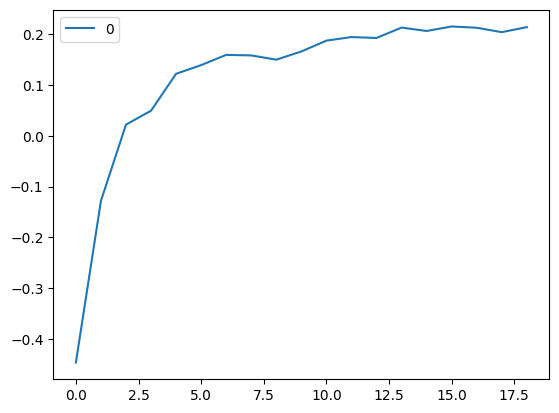

In [ ]:
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()


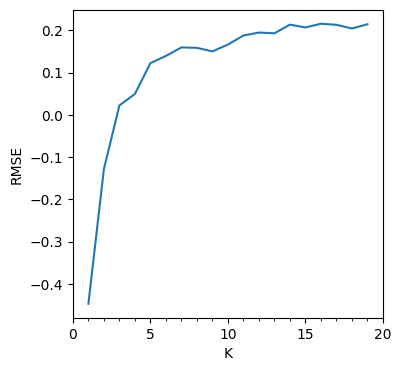

In [ ]:
from matplotlib.ticker import MultipleLocator

fig, ax = plt.subplots(figsize=(4,4), dpi = 100)
ax.plot(list(range(1,20)),rmse_val);
ax.set_xlim(0,20)
ax.xaxis.set_minor_locator(MultipleLocator(1))
ax.set_xlabel("K")
ax.set_ylabel("RMSE")
plt.show()

In [ ]:
y_test_pred_knn = knn_models[16].predict(X_test)
print (y_test_pred_knn)

[0.0625 0.5    0.375  0.5625 0.4375 0.0625 0.4375 0.5625 0.0625 0.125
 0.5625 0.375  0.3125 0.75   0.5625 0.75   0.4375 0.     0.25   0.875
 0.1875 0.5625 0.3125 0.4375 0.25   0.375  0.4375 0.5625 0.375  0.3125
 0.3125 0.5    0.1875 0.     0.0625 0.4375 0.375  0.125  0.125  0.0625
 0.5625 0.75   0.25   0.     0.625  0.25   0.5625 0.5    0.9375 0.125
 0.375  0.     0.0625 0.0625 0.4375 0.5625 0.25   0.6875 0.25   0.375
 0.0625 0.8125 0.6875 0.0625 0.25   0.0625 0.3125 0.4375 0.4375 0.5
 0.0625 0.25   0.5    0.5625 0.125  0.5    0.0625 0.25   0.8125 0.0625
 0.5    0.25   0.125  0.8125 0.25   0.25   0.6875 0.5625 0.4375 0.125
 0.1875 0.125  0.5    0.0625 0.8125 0.125  0.5    0.0625 0.75   0.
 0.625  0.25   0.6875 0.875  0.75   0.625  0.3125 0.1875 0.     0.3125
 0.75   0.375  0.0625 0.25   0.25   0.3125 0.875  0.3125 0.3125 0.3125
 0.375  0.6875 0.6875 0.4375 0.3125 0.0625 0.75   0.125  0.4375 0.125
 0.75   0.1875 0.125  0.8125 0.1875 0.5625 0.6875 0.125  0.1875 0.75
 0.     0.6875 0.    

In [ ]:
y_train_pred_knn = knn_models[16].predict(X_train)
print (y_train_pred_knn)

[0.375  0.0625 0.3125 0.0625 0.125  0.375  0.25   0.5625 0.8125 0.0625
 0.625  0.5    0.3125 0.25   0.375  0.0625 0.1875 0.0625 0.0625 0.5
 0.4375 0.3125 0.1875 0.75   0.375  0.4375 0.1875 0.875  0.4375 0.0625
 0.0625 0.8125 0.0625 0.25   0.0625 0.1875 0.625  0.25   0.4375 0.4375
 0.5625 0.75   0.375  0.0625 0.8125 0.125  0.8125 0.375  0.875  0.625
 0.25   0.5625 0.25   0.0625 0.3125 0.375  0.125  0.5    0.3125 0.25
 0.375  0.0625 0.5625 0.75   0.5    0.0625 0.875  0.0625 0.125  0.
 0.375  0.5    0.0625 0.875  0.5625 0.5    0.5625 0.0625 0.4375 0.0625
 0.3125 0.6875 0.1875 0.4375 0.1875 0.1875 0.5    0.375  0.125  0.1875
 0.9375 0.0625 0.25   0.1875 0.1875 0.     0.1875 0.     0.3125 0.125
 0.6875 0.4375 0.125  0.8125 0.5    0.5625 0.8125 0.125  0.375  0.1875
 0.1875 0.0625 0.75   0.4375 0.0625 0.125  0.25   0.1875 0.6875 0.125
 0.625  0.3125 0.0625 0.4375 0.5625 0.5625 0.5625 0.5625 0.125  0.4375
 0.1875 0.5625 0.4375 0.375  0.25   0.1875 0.3125 0.0625 0.3125 0.8125
 0.1875 0.125  0.6

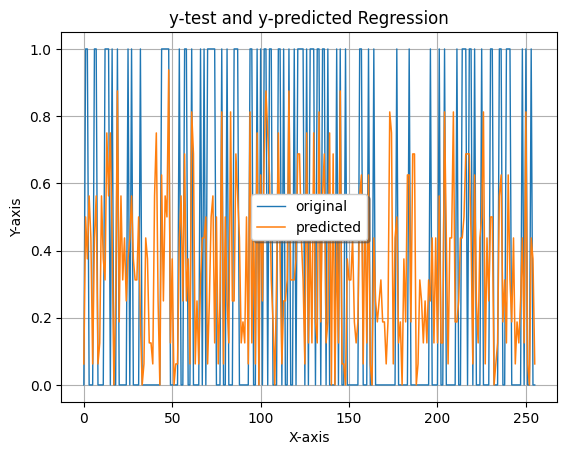

In [ ]:
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, linewidth=1, label="original")
plt.plot(x_ax, y_test_pred_knn , linewidth=1.1, label="predicted")
plt.title("y-test and y-predicted Regression")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

# Wir machen einen Vergleich zwischen knn und LR

In [ ]:
matrix2= pd.DataFrame({'y_train': y_train, 'y_train_pred_lm': y_pred_train_lm, 'Residuals_train_lm': y_train - y_pred_train_lm, 'y_train_pred_knn': y_train_pred_knn, 'Residuals_train_knn':  y_train - y_train_pred_knn })


In [ ]:
matrix2

,y_train,y_train_pred_lm,Residuals_train_lm,y_train_pred_knn,Residuals_train_knn
657,0,0.420301,-0.420301,0.3750,-0.3750
462,0,0.230962,-0.230962,0.0625,-0.0625
171,1,0.529710,0.470290,0.3125,0.6875
210,0,-0.011169,0.011169,0.0625,-0.0625
147,0,0.296728,-0.296728,0.1250,-0.1250
...,...,...,...,...,...
113,0,0.120407,-0.120407,0.0625,-0.0625
556,0,0.174914,-0.174914,0.1250,-0.1250
254,1,0.397552,0.602448,0.4375,0.5625
647,1,0.698062,0.301938,0.8125,0.1875


In [ ]:
matrix= pd.DataFrame({'Model': ['model_lm', 'model_knn'], 'Train': [rsq_train,r2_score_train_knn], 'Test': [rsq_test, r2_score_test_knn]})

In [ ]:
matrix

,Model,Train,Test
0,model_lm,0.309112,0.279371
1,model_knn,0.306789,0.214233


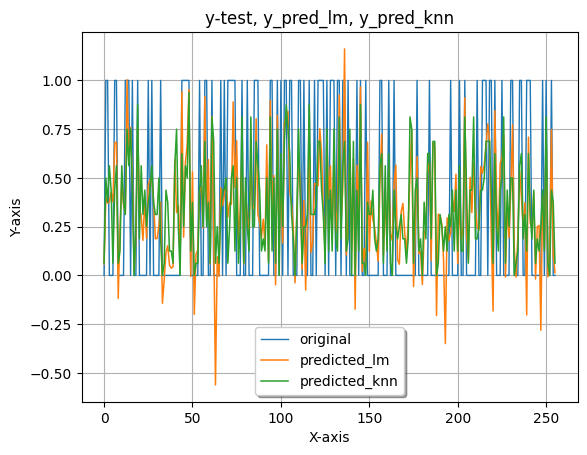

In [ ]:
plt.plot(figsize=(10, 20))
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, linewidth=1, label="original")
plt.plot(x_ax,y_pred_test_lm, linewidth=1.1, label="predicted_lm" )
plt.plot(x_ax,y_test_pred_knn, linewidth=1.1, label="predicted_knn" )
plt.title("y-test, y_pred_lm, y_pred_knn")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
#plt.plot(5,5)
#plt.plot(10, 10)
plt.show()

In [ ]:
#matrix2= pd.DataFrame({'y_train': y_train, 'y_train_pred_lm': y_pred_train_lm, 'Residuals_train_lm': y_train - y_pred_train_lm, 'y_train_pred_knn': y_train_pred_knn, 'Residuals_train_knn':  y_train - y_train_pred_knn })

# <p style="color:green;">Decision Trees (DTs)<p> 

#Decision Trees (DTs) sind eine nichtparametrische überwachte Lernmethode, die für die Klassifizierung und Regression verwendet wird. Das Ziel besteht darin, ein Modell zu erstellen, das den Wert einer Zielvariablen vorhersagt, indem es einfache Entscheidungsregeln lernt, die aus den Datenmerkmalen abgeleitet werden. Ein Baum kann als stückweise konstante Annäherung angesehen werden.
#Decision Trees (DTs) are a non-parametric supervised learning method used for classification and regression. The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features. A tree can be seen as a piecewise constant approximation.

Some advantages of decision trees are:

Simple to understand and to interpret. Trees can be visualized.

Requires little data preparation. Other techniques often require data normalization, dummy variables need to be created and blank values to be removed. Note however that this module does not support missing values.

The cost of using the tree (i.e., predicting data) is logarithmic in the number of data points used to train the tree.

Able to handle both numerical and categorical data. However, the scikit-learn implementation does not support categorical variables for now. Other techniques are usually specialized in analyzing datasets that have only one type of variable. See algorithms for more information.

Able to handle multi-output problems.

Uses a white box model. If a given situation is observable in a model, the explanation for the condition is easily explained by boolean logic. By contrast, in a black box model (e.g., in an artificial neural network), results may be more difficult to interpret.

Possible to validate a model using statistical tests. That makes it possible to account for the reliability of the model.

Performs well even if its assumptions are somewhat violated by the true model from which the data were generated.

NOTE: The decision tree does not support categorical data as features.

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
regr = DecisionTreeRegressor(max_depth=5)
model = regr.fit(X_train, y_train)

In [ ]:
print("Train data R2 was: {:.2f} ".format(regr.score(X_train, y_train)))
print("Test data R2 was: {:.2f}".format(regr.score(X_test, y_test)))

Train data R2 was: 0.54 
Test data R2 was: 0.15


In [ ]:
y_pred_train= regr.predict(X_train)

In [ ]:
y_pred_train

array([0.5       , 0.5       , 1.        , 0.02255639, 0.5       ,
       0.8       , 0.26315789, 0.26315789, 0.93877551, 0.06060606,
       1.        , 0.93877551, 0.27272727, 0.26315789, 0.        ,
       0.02255639, 0.27272727, 0.02255639, 0.02255639, 1.        ,
       0.60869565, 0.5       , 0.02255639, 0.93877551, 0.5       ,
       0.14285714, 0.27272727, 1.        , 0.93877551, 0.06060606,
       0.06060606, 0.93877551, 0.34482759, 0.02255639, 0.        ,
       0.02255639, 0.26315789, 0.02255639, 1.        , 0.27272727,
       0.66666667, 0.75      , 0.27272727, 0.06060606, 0.93877551,
       0.        , 0.75      , 0.02255639, 0.75      , 0.14285714,
       0.        , 0.66666667, 0.        , 0.02255639, 0.02255639,
       1.        , 0.06060606, 0.66666667, 0.5       , 0.02255639,
       0.        , 0.02255639, 0.27272727, 0.93877551, 0.60869565,
       0.        , 0.93877551, 0.34482759, 0.27272727, 0.02255639,
       0.75      , 0.66666667, 0.02255639, 0.93877551, 0.93877

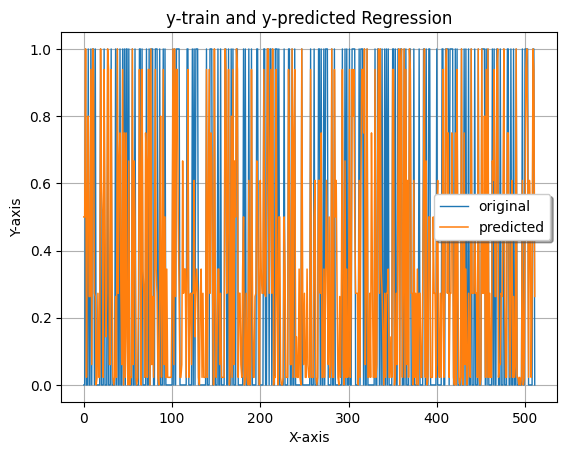

In [ ]:
x_ax = range(len(y_train))
plt.plot(x_ax, y_train, linewidth=1, label="original")
plt.plot(x_ax, y_pred_train, linewidth=1.1, label="predicted")
plt.title("y-train and y-predicted Regression")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

In [ ]:
pip install shap

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
import shap
print(shap.__version__)


0.44.0


In [ ]:

import shap
shap.initjs()

In [ ]:
explainer = shap.Explainer(model)
shap_values = explainer(X)

In [ ]:
X = diabetes_data.drop("Outcome",axis = 1)
y = diabetes_data['Outcome']

In [ ]:
from sklearn import linear_model
lin_regr = linear_model.LinearRegression()
lin_regr.fit(X_train, y_train)



LinearRegression()

In [ ]:
ex = shap.Explainer(lin_regr, X_train)
shap_values = ex(X_test)

SHAP values are all relative to some base value. By default, the base value is explainer.expected_value: the mean of the raw model predictions for the training data.

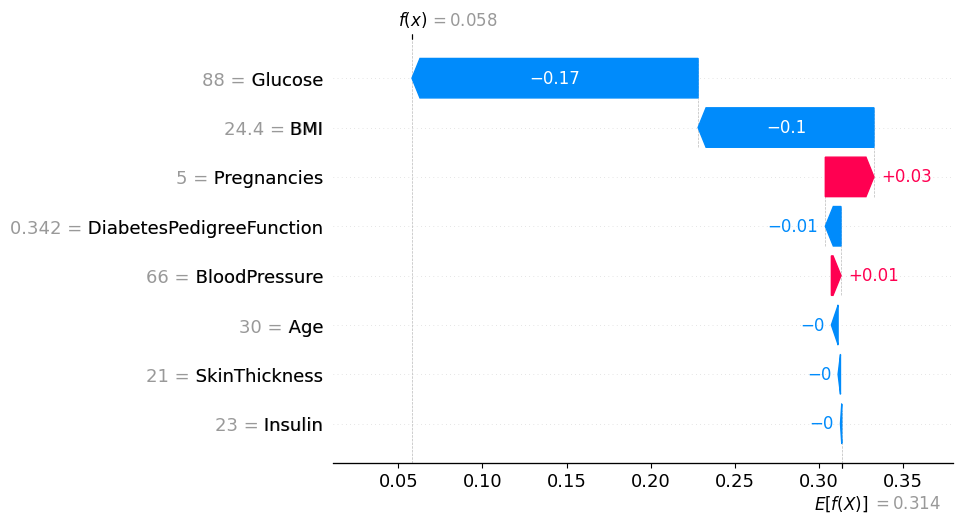

In [ ]:
shap.plots.waterfall(shap_values[0])

In the waterfall above, the x-axis has the values of the outcome . x is the chosen observation, f(x) is the predicted value of the model, given input x and E[f(x)] is the expected value of the target variable, or in other words, the mean of all predictions
This visualization show us the increase or the decrease of the prediction compared tp expected value E(f(x))

Pregnancies of 0,04 and the blood presssure increase the prediction of the outcome

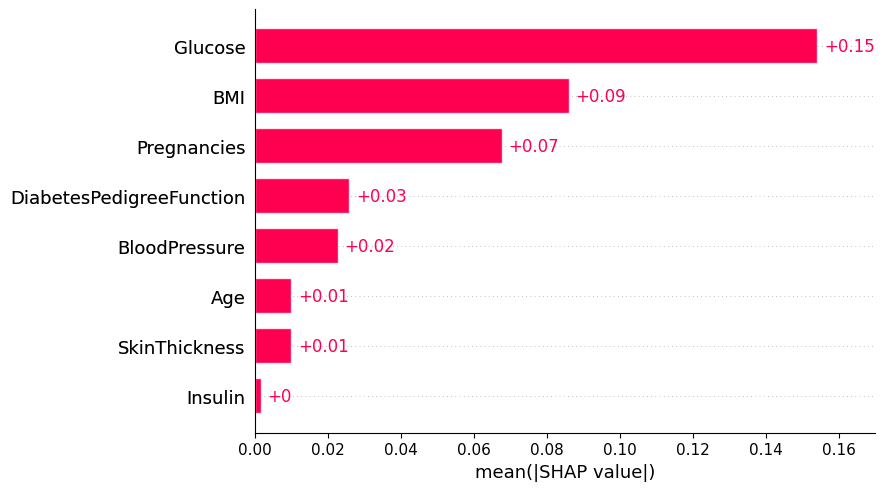

In [ ]:
shap.plots.bar(shap_values)

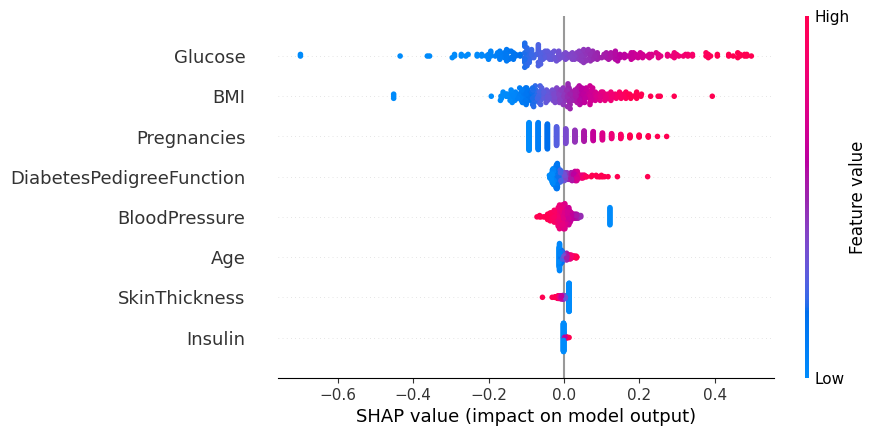

In [ ]:
shap.plots.beeswarm(shap_values)

For example, high values of Glucose have a high positive contribution on the prediction, while low values have a high negative contribution. for the variable insuline have almost no contribution to the prediction, whether its values are high oAll variables are shown in the order of global feature importance, the first one being the most important and the last being the least important one.r low.
All variables are shown in the order of global feature importance, the first one being the most important and the last being the least important one.
